ToggleButtons(description='System\xa0Config:', index=1, options=('1\xa0Mass', '2\xa0Masses'), value='2\xa0Mass…


**Gravitational Potential Field**  
$$
\Phi(x,y) = -G \sum_{i=1}^n \frac{M_i}{\sqrt{(x - x_i)^2 + (y - y_i)^2}}
$$

**Equipotential Contours**  
$$
\Phi(x,y) = \text{constant}
$$

**Gravitational Energy Density**  
$$
U(x,y) = \frac{\lvert\nabla \Phi\rvert^2}{8\pi G}
$$



**Gravitational Field (Vector Plot)**  
$$
\mathbf{g}(x,y) = -\nabla \Phi(x,y)
$$


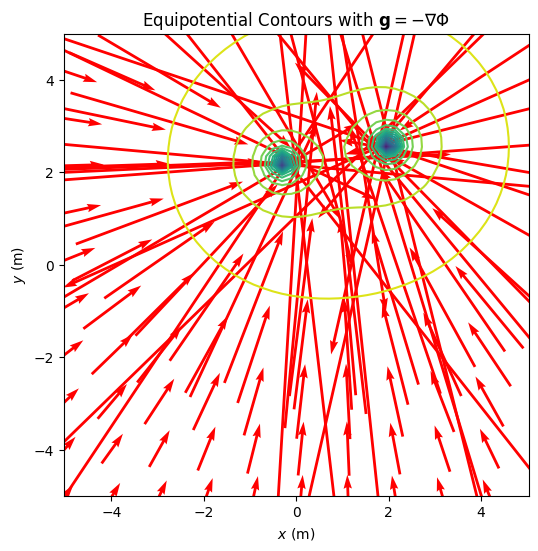


**System Parameters**  
$$
M_{1} = 4.0 \times 10^{22}\,\mathrm{kg},\quad M_{2} = 3.5 \times 10^{22}\,\mathrm{kg}
$$

$$
\mathbf{r}_{1} = (2.0,2.6)\,\mathrm{m},\quad \mathbf{r}_{2} = (-0.3,2.2)\,\mathrm{m}
$$

**Total Gravitational Potential Energy**  
$$
U = -G \sum_{i<j} \frac{M_i\,M_j}{r_{ij}}
\;=\; -4.003e+34\,\mathrm{J}
$$


In [28]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, Markdown
import ipywidgets as widgets

# Constants
G = 6.67430e-11   # m^3 kg^-1 s^-2
SCALE = 1e22      # to format masses in 10^22 kg

# 1) Gravitational potential at (x,y)
def calc_pot(x, y, masses, pos):
    φ = 0.0
    for m, (xi, yi) in zip(masses, pos):
        r = max(np.hypot(x - xi, y - yi), 0.1)
        φ += -G * m / r
    return φ

# 2) Energy density u = |∇φ|^2 / (8πG)
def calc_Udens(x, y, masses, pos, h=0.1):
    gx = (calc_pot(x+h, y, masses, pos) - calc_pot(x-h, y, masses, pos)) / (2*h)
    gy = (calc_pot(x, y+h, masses, pos) - calc_pot(x, y-h, masses, pos)) / (2*h)
    return (gx*gx + gy*gy) / (8 * np.pi * G)

# 3) Total gravitational potential energy
def total_U(masses, pos):
    U = 0.0
    for i in range(len(masses)):
        for j in range(i+1, len(masses)):
            xi, yi = pos[i]
            xj, yj = pos[j]
            r = max(np.hypot(xi - xj, yi - yj), 0.1)
            U += -G * masses[i] * masses[j] / r
    return U

# 4) Main visualization routine
def visualize(masses, pos):
    # Grid
    x_vals = np.linspace(-5, 5, 50)
    y_vals = np.linspace(-5, 5, 50)
    X, Y = np.meshgrid(x_vals, y_vals)
    Zφ = np.array([[calc_pot(xx, yy, masses, pos) for xx, yy in zip(Xr, Yr)]
                   for Xr, Yr in zip(X, Y)])
    ZU = np.array([[calc_Udens(xx, yy, masses, pos) for xx, yy in zip(Xr, Yr)]
                   for Xr, Yr in zip(X, Y)])

    # 4.1) Display formulae
    display(Markdown(r"""
**Gravitational Potential Field**
$$
\Phi(x,y) = -G \sum_{i=1}^n \frac{M_i}{\sqrt{(x - x_i)^2 + (y - y_i)^2}}
$$

**Equipotential Contours**
$$
\Phi(x,y) = \text{constant}
$$

**Gravitational Energy Density**
$$
U(x,y) = \frac{\lvert\nabla \Phi\rvert^2}{8\pi G}
$$
"""))

    # 4.2) 3D surface of Φ
    fig1 = go.Figure(go.Surface(x=X, y=Y, z=Zφ, colorscale='Viridis'))
    fig1.update_layout(
        title=r'3D Gravitational Potential $\Phi(x,y)$',
        scene=dict(
            xaxis_title=r'x(m)',
            yaxis_title=r'y(m)',
            zaxis_title=r'Phi(x,y)(J/kg)'
        ), height=500
    )
    fig1.show(renderer="colab")

    # 4.3) 2D contour of Φ
    fig2 = go.Figure(go.Contour(
        x=x_vals, y=y_vals, z=Zφ, colorscale='Viridis',
        contours=dict(showlabels=True, labelfont=dict(size=12))
    ))
    fig2.update_layout(
        title=r'Equipotential Contours of $\Phi(x,y)$',
        xaxis_title=r'$x\ (\mathrm{m})$',
        yaxis_title=r'$y\ (\mathrm{m})$',
        height=500
    )
    fig2.show(renderer="colab")

    # 4.4) 2D contour of U density
    fig3 = go.Figure(go.Contour(
        x=x_vals, y=y_vals, z=ZU, colorscale='Plasma',
        contours=dict(showlabels=True, labelfont=dict(size=12))
    ))
    fig3.update_layout(
        title=r'Gravitational Energy Density $U(x,y)$',
        xaxis_title=r'$x\ (\mathrm{m})$',
        yaxis_title=r'$y\ (\mathrm{m})$',
        height=500
    )
    fig3.show(renderer="colab")

    # 4.5) Vector‐field formula in LaTeX
    display(Markdown(r"""
**Gravitational Field (Vector Plot)**
$$
\mathbf{g}(x,y) = -\nabla \Phi(x,y)
$$
"""))

    # 4.6) Matplotlib quiver over contours
    dZ_dy, dZ_dx = np.gradient(Zφ, y_vals, x_vals)
    g_x = -dZ_dx; g_y = -dZ_dy
    step = 5
    Xq = X[::step, ::step]; Yq = Y[::step, ::step]
    gxq = g_x[::step, ::step]; gyq = g_y[::step, ::step]

    plt.figure(figsize=(6,6))
    plt.contour(X, Y, Zφ, levels=20, cmap='viridis')
    plt.quiver(Xq, Yq, gxq, gyq, color='red', pivot='mid', scale=1e12)
    plt.xlabel(r'$x\ (\mathrm{m})$')
    plt.ylabel(r'$y\ (\mathrm{m})$')
    plt.title(r'Equipotential Contours with $\mathbf{g}=-\nabla\Phi$')
    plt.axis('equal')
    plt.show()

    # 4.7) System parameters & corrected total U in LaTeX
    Utot = total_U(masses, pos)
    mass_list = [
        f"M_{{{i+1}}} = {m/SCALE:.1f} \\times 10^{{22}}\,\\mathrm{{kg}}"
        for i, m in enumerate(masses)
    ]
    mass_tex = ",\\quad ".join(mass_list)
    pos_list = [
        f"\\mathbf{{r}}_{{{i+1}}} = ({xi:.1f},{yi:.1f})\,\\mathrm{{m}}"
        for i, (xi, yi) in enumerate(pos)
    ]
    pos_tex = ",\\quad ".join(pos_list)

    display(Markdown(rf"""
**System Parameters**
$$
{mass_tex}
$$

$$
{pos_tex}
$$

**Total Gravitational Potential Energy**
$$
U = -G \sum_{{i<j}} \frac{{M_i\,M_j}}{{r_{{ij}}}}
\;=\; {Utot:.3e}\,\mathrm{{J}}
$$
"""))

# ─── Widget setup ─────────────────────────────────────
mass1 = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1,
                            description='Mass 1 (×10²² kg):')
x1     = widgets.FloatSlider(value=2.0, min=-5.0, max=5.0, step=0.1,
                             description='X₁:')
y1     = widgets.FloatSlider(value=2.6, min=-5.0, max=5.0, step=0.1,
                             description='Y₁:')
mass2 = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1,
                            description='Mass 2 (×10²² kg):')
x2     = widgets.FloatSlider(value=-2.0, min=-5.0, max=5.0, step=0.1,
                             description='X₂:')
y2     = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1,
                             description='Y₂:')
toggle = widgets.ToggleButtons(options=['1 Mass','2 Masses'],
                               description='System Config:')

def on_change(_):
    clear_output(wait=True)
    display(toggle)
    display(widgets.HBox([mass1, x1, y1]))
    if toggle.value == '2 Masses':
        display(widgets.HBox([mass2, x2, y2]))
    Mlist = [mass1.value * SCALE]
    Plist = [(x1.value, y1.value)]
    if toggle.value == '2 Masses':
        Mlist.append(mass2.value * SCALE)
        Plist.append((x2.value, y2.value))
    visualize(Mlist, Plist)

toggle.observe(on_change, 'value')
for w in [mass1, x1, y1, mass2, x2, y2]:
    w.observe(on_change, 'value')

# Initialize visualization
on_change(None)
